In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Data Set creation

In [3]:
test_data=pd.read_csv('Titanic_test.csv')

FileNotFoundError: File b'Titanic_test.csv' does not exist

In [3]:
survival_data=pd.read_csv('Titanic_survival.csv')

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
survival_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
data=pd.concat([test_data,survival_data['Survived']],axis=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


### Data Cleaning

In [7]:
data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Earnshaw, Mrs. Boulton (Olive Potter)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.363636
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.481622
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,1.000000


In [8]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [9]:
#There are 86 null values in Age, 1 in Fare and 327 in Cabin columns

In [10]:
#Treating null value in Fare

In [11]:
data[data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [12]:
data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [13]:
#Therfore, we can use 8.05 as our replacement of null value

In [14]:
data.Fare.fillna(8.05,inplace=True)
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [15]:
#Treating the null values in Age column

In [16]:
data[data['Age'].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,1
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,1


In [17]:
#We will fill Age based on the Prefix title of Name

name_column=str()
fname=str()
title=list()
for i in data.Name:
    name_column=(str(i))
    fname=(name_column.split(',')[1])
    title.append(fname.split('.')[0])
s=set(title)
print(s)
for i in range(len(title)):
    if(title[i]==' Ms'):
        title[i]=' Mrs'
s=set(title)
print("After replacing Ms with Mrs.",s)

{' Ms', ' Dona', ' Rev', ' Miss', ' Mr', ' Col', ' Dr', ' Master', ' Mrs'}
After replacing Ms with Mrs. {' Dona', ' Rev', ' Miss', ' Mr', ' Col', ' Dr', ' Master', ' Mrs'}


In [18]:
data['Title']=title

In [19]:
data['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Col', ' Rev', ' Dr', ' Dona'],
      dtype=object)

In [20]:
# replace missing values
title_age=data.groupby('Title').Age.transform('median')
data.Age.fillna(title_age,inplace=True)

In [21]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

In [22]:
#Cabin is having more null values. We will treat it by creating a new column called deck that would have the first alphabet of Cabin

In [23]:
deck=np.where(pd.notnull(data['Cabin']),str(data['Cabin'])[0].upper(),'Z')

In [24]:
def f(c):
    return np.where(pd.notnull(c),str(c)[0].upper(),'X')
data['Deck'] = data['Cabin'].map(lambda x : f(x))

In [25]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,X
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,X
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,X
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,X
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,X


In [26]:
#Hence, we can drop the Cabin column
del(data['Cabin'])

In [27]:
#The columns Name,Ticket and Title is of no use anymore. Hence we will drop these columns

del(data['Name'])
del(data['Title'])
del(data['Ticket'])

In [28]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Deck
0,892,3,male,34.5,0,0,7.8292,Q,0,X
1,893,3,female,47.0,1,0,7.0000,S,1,X
2,894,2,male,62.0,0,0,9.6875,Q,0,X
3,895,3,male,27.0,0,0,8.6625,S,0,X
4,896,3,female,22.0,1,1,12.2875,S,1,X


### Outlier treatment 

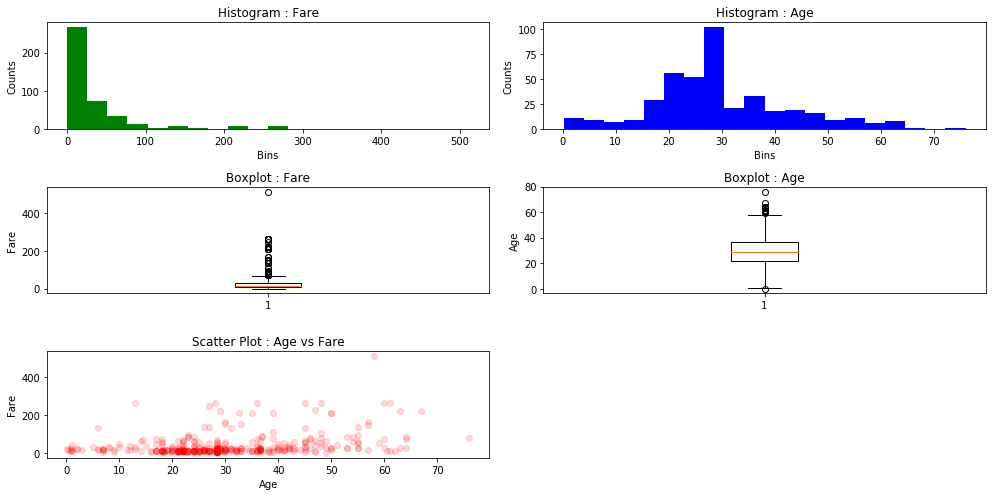

In [29]:
#The columns Fare and Age tend to have more outliers as they are the columns with continuous values

# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(data.Fare, bins=20, color='g')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(data.Age, bins=20, color='b')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(data.Fare.values)
ax_arr[1,0].set_title('Boxplot : Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(data.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(data.Age, data.Fare, color='r', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()


plt.show()

In [30]:
#From the above set of graphs, it is clear that, Fare has lot of outliers and Age has few outliers too.

In [31]:
#As there are more outliers in the Fare column, we cannot remove it.
#Also, it is possible that, people embarked from various ports and different passenger classes has impact over Price.


# 1. Survival Rate

In [32]:
#Survival Rate can be given in multiple ways.

#1. Based on Age

#Children vs Adults

data['TypeAge']=np.where(data['Age'] >= 18, 'Adult','Child')
pd.crosstab(data.Survived, data.TypeAge)

TypeAge,Adult,Child
Survived,,
0,238,28
1,135,17


In [33]:
#2. Based on Gender

pd.crosstab(data.Survived, data.Sex)

Sex,female,male
Survived,,
0,0,266
1,152,0


In [34]:
#3. Based on PassengerClass

pd.crosstab(data.Survived, data.Pclass)

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


In [35]:
#4. Based on Embarked

pd.crosstab(data.Survived, data.Embarked)

Embarked,C,Q,S
Survived,,,
0,62,22,182
1,40,24,88


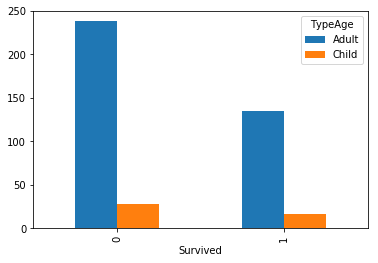

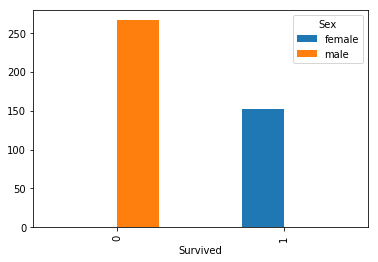

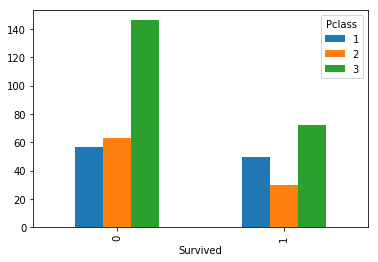

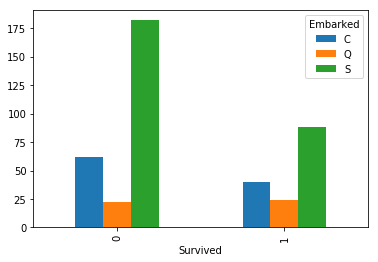

In [36]:
pd.crosstab(data.Survived, data.TypeAge).plot(kind='bar')
pd.crosstab(data.Survived, data.Sex).plot(kind='bar')
pd.crosstab(data.Survived, data.Pclass).plot(kind='bar')
pd.crosstab(data.Survived, data.Embarked).plot(kind='bar')

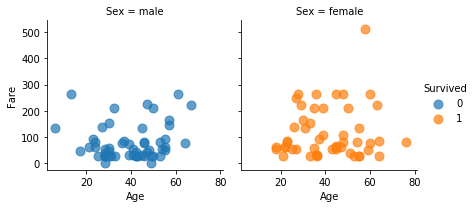

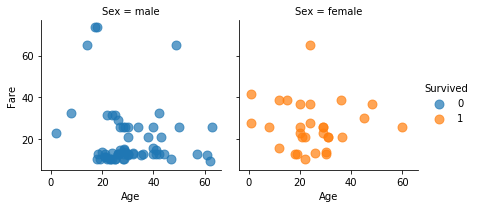

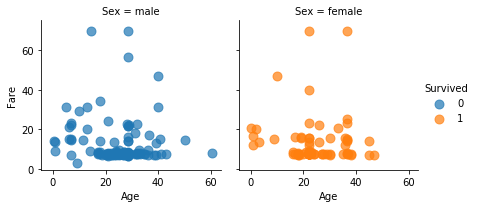

In [37]:
def f_plot(pclass):
    g = sns.FacetGrid(data[data['Pclass'] == pclass], col='Sex',col_order=['male', 'female'],hue='Survived', )
    g = (g.map(plt.scatter, 'Age', 'Fare', alpha=0.7, s=80).add_legend())

s=set(data['Pclass'])
for i in s:
    f_plot(i)

    Insights:
        1. Males had 0% survival rate whereas all female were survived. (i.e. Survival rate of females is 100%).
        2. Among the type of Age(Children or Adult), Children had a better chance of survival.
        3. Higher the Passenger class, better the survival rate.
        4. Last graph makes it clear that there are outliers with respect to Age and Fare.
        5. Irrespective of 2,3,4, it is females who survived. Females survived irrespective of any other attribute.

## 2. Passengers who didn't survive:

In [38]:
#Passesngers who didn't survive are below.

In [39]:
ByGender = data.groupby('Sex')['Survived'].mean()
ByGender

Sex
female    1
male      0
Name: Survived, dtype: int64

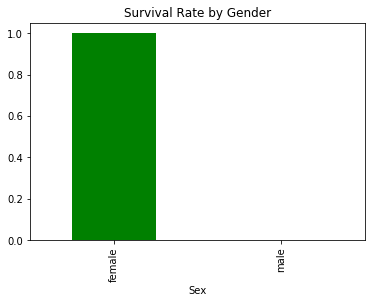

In [40]:
ByGender.plot.bar( color='g', title='Survival Rate by Gender')

Insights:

1. Irrespective of the catgories, Age, Embarkment, Fare, Passenger Class, etc. Males didn't survive.
2. People boarded from 'Q' (Queenstown) had a better chance at survival than other two places

## Better chance at survival

In [41]:
#Show us EDA that can best explain the fate of the passenger and 
#show us which of the variables are significant in explaining this 

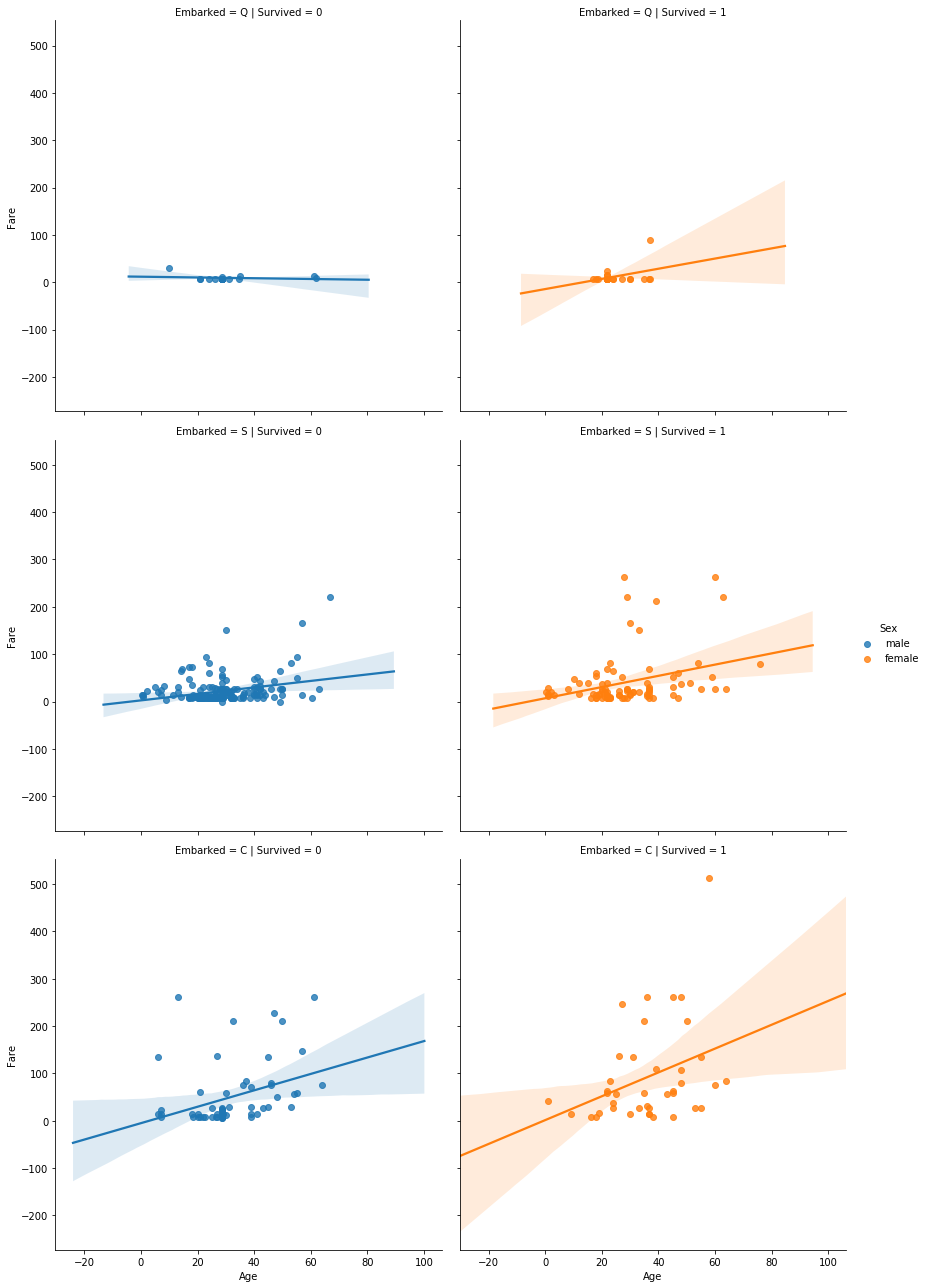

In [42]:
sns.lmplot(x='Age',y='Fare',hue='Sex',data=data,fit_reg=True,height=6,col='Survived',row='Embarked')
plt.show()

In [43]:
data['Embarked'].value_counts(normalize=True)

S    0.645933
C    0.244019
Q    0.110048
Name: Embarked, dtype: float64

In [44]:
print('skewness for age : {0:.2f}'.format(data['Age'].skew()))
print('skewness for fare : {0:.2f}'.format(data['Fare'].skew()))

skewness for age : 0.55
skewness for fare : 3.69


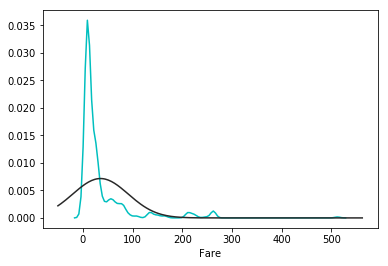

In [45]:
sns.distplot(data['Fare'], color='c',fit=norm,hist=False)

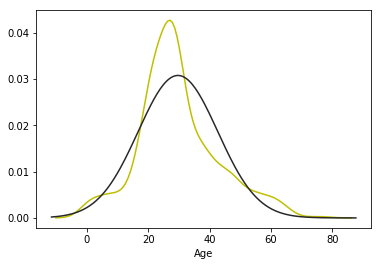

In [46]:
sns.distplot(data['Age'], color='y',fit=norm,hist=False);

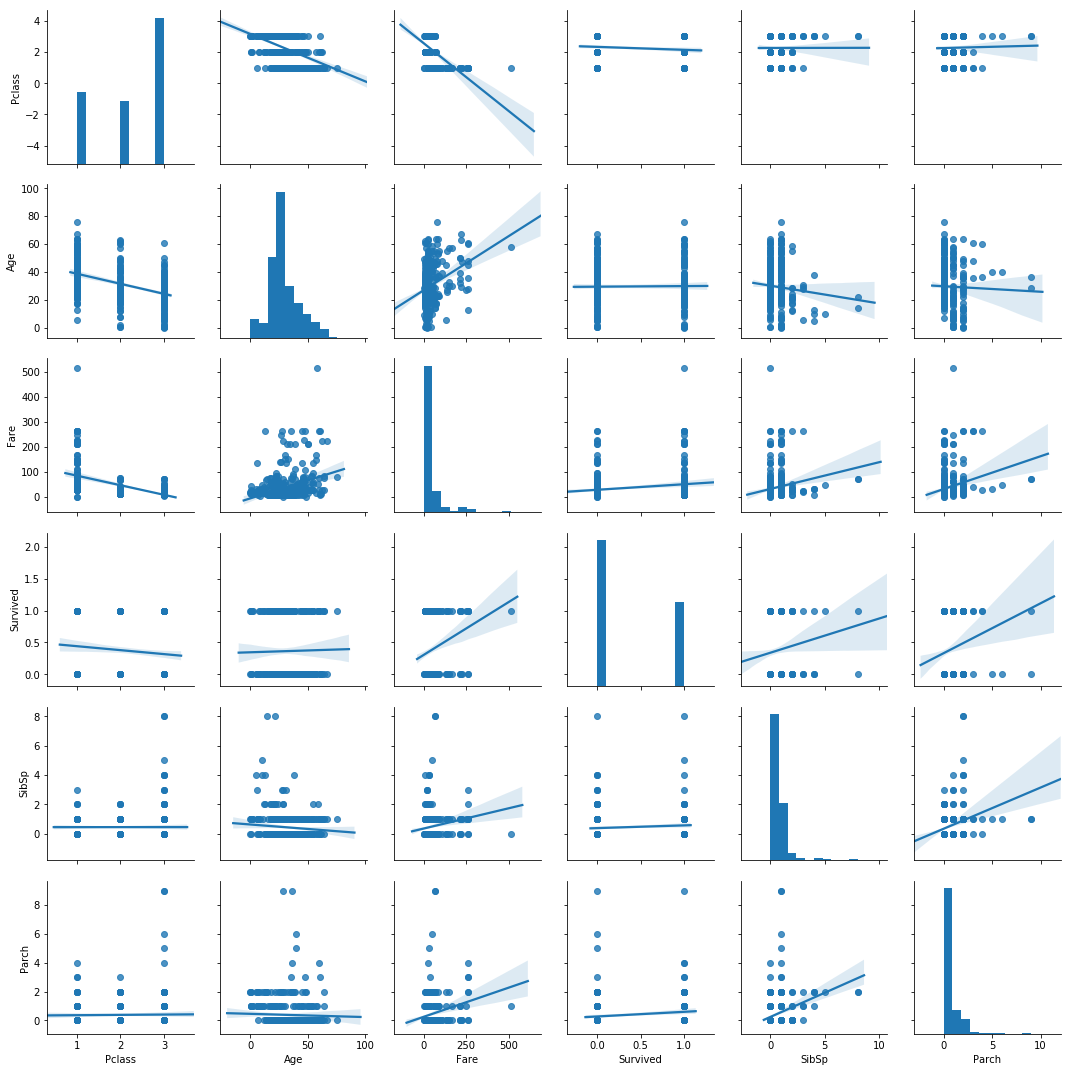

In [47]:
sns.pairplot(data[['Pclass','Age','Fare','Sex','Survived','SibSp','Parch']],kind='reg')

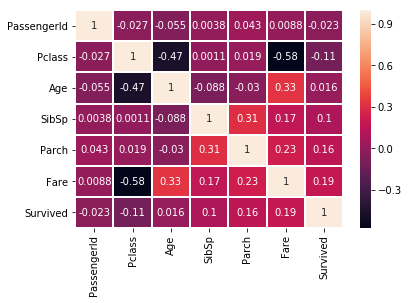

In [48]:
sns.heatmap(data.corr(), annot=True,linewidths=1);

In [49]:
# familysize

data['familysize']=data['SibSp']+data['Parch']+1
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Deck,TypeAge,familysize
0,892,3,male,34.5,0,0,7.8292,Q,0,X,Adult,1
1,893,3,female,47.0,1,0,7.0000,S,1,X,Adult,2
2,894,2,male,62.0,0,0,9.6875,Q,0,X,Adult,1
3,895,3,male,27.0,0,0,8.6625,S,0,X,Adult,1
4,896,3,female,22.0,1,1,12.2875,S,1,X,Adult,3


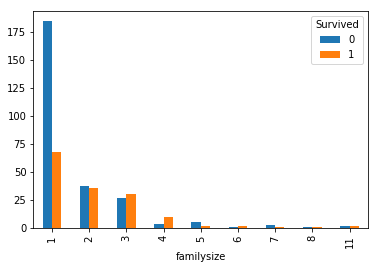

In [50]:
pd.crosstab(data.familysize,data.Survived ).plot(kind='bar')

In [51]:
data.groupby(['Pclass', 'Embarked']).Fare.count()

Pclass  Embarked
1       C            56
        Q             1
        S            50
2       C            11
        Q             4
        S            78
3       C            35
        Q            41
        S           142
Name: Fare, dtype: int64

## Conclusion on Insights:

1. Males were having 0% chance at survival whereas Females had 100% chance at survival
2. Chance at survival decreases with increase in family size
3. Age and Fare are positively skewed
4. More people boarded at Southampton and there is negligible count of outliers in Queenstown
5. Passenger Class is highly correlated with Age and Fare
6. Kind of passengers who could survive is purely dependant on the "SEX" column. Females Survive.